# TIES483 Assignment, Mikael Myyrä

***

## Problem 1

A window is being built and the bottom is a rectangle and the top is a semicircle. If there is 12 m of framing materials what must the dimensions of the window be to make the window area as big as possible?

Model the decision problem as an optimization problem and solve it with a method of your choosing. **Analyse the result!**

***

The relevant measurements (circumference and area) of the window can be expressed as functions of width $w$ and height $h$. The circumference is $w + 2h$ for the rectangular part and $\pi \frac{w}{2}$ for the circular part, so the total circumference is $C(w, h) = (1 + \frac{\pi}{2})w + 2h$. The area is $wh$ for the rectangular part and $\pi (\frac{w}{2})^2$ for the circular part, so the total area is $A(w, h) = wh + \frac{\pi}{4} w^2$. We're trying to maximize $A$ (and thus minimize $-A$) subject to the linear constraint $C = 12$. Also, $w$ and $h$ must be greater than zero because this is a real window. In formal terms, the problem is

$$
\begin{align}
\min \qquad & -wh - \frac{\pi}{4} w^2 \\
\text{s.t.} \qquad & (1 + \frac{\pi}{2})w + 2h = 12 \\
& w, r > 0
\end{align}
$$

In this simple case it should be possible to find a solution analytically using the stationarity rule from the KKT conditions. Let's try it. The Lagrangian for this problem is

$$
L(w, h) = -wh - \frac{\pi}{4} w^2 - \lambda(1 + \frac{\pi}{2})w - 2\lambda h
$$

and its gradient

$$
\nabla L(w, h) = (-h - \frac{\pi}{2} w - \lambda(1 + \frac{\pi}{2}), -w - 2\lambda).
$$

We're looking for points where
$$
\nabla L(w, h) = \mathbf{0} \\
\begin{cases}
-h - \frac{\pi}{2}w - \lambda(1 + \frac{\pi}{2}) = 0 \\
-w - 2\lambda = 0
\end{cases} \\
w = -\frac{\lambda}{2} \\
-h + (\frac{\pi}{4} - (1 + \frac{\pi}{2}))\lambda = 0 \iff h = (-\frac{\pi}{4} - 1)\lambda
$$

Applying the constraint, we find feasible values for $\lambda$:

$$
\begin{align}
(1 + \frac{\pi}{2})w + 2h &= 12 \\
(1 + \frac{\pi}{2})(-\frac{\lambda}{2}) + 2(-\frac{\pi}{4} - 1)\lambda &= 12 \\x
(-\frac12 - \frac{\pi}{4} - \frac{\pi}{2} - 2)\lambda &= 12 \\
(-\frac{3\pi}{4} - \frac{5}{2})\lambda &= 12 \\
\lambda &= \frac{-12}{\frac{3\pi}{4} + \frac{5}{2}}
\end{align}
$$

now, applying $\lambda$ back to $w$ and $h$, we get

$$
w = -\frac{\lambda}{2} = \frac{12}{\frac{3\pi}{2} + 5} \approx 1.236 \\
h = (-\frac{\pi}{4} - 1) \lambda 
  = \frac{3\pi + 12}{\frac{3\pi}{4} + \frac{5}{2}} \approx 4.412.
$$

Analysis: Because we used the KKT conditions to come up with this solution analytically, we already know it's optimal. Just to check that the calculations were correct, you can plug $w$ and $h$ back into the constraint function to ensure it holds. Plugging said values into the objective function and flipping the sign gives the optimal area of the window, which comes out to be approximately $6.653 m^2$.

***

## Problem 2

The 10-dimensional Robsenbrock function (one of the variants) is defined as
$$
f(\mathbf{x}) = \sum_{i=1}^{9} 100 (x_{i+1} - x_i^2 )^2 + (1-x_i)^2
$$
for $x\in\mathbb R^{10}$. 

Compare at least two different optimization method's performance in minimizing this function over $\mathbb R^{10}$. You can decide the method of comparison as the one that makes most sense to you. **Analyze the results!**

***

In [1]:
# first, let's define the problem in Python

def obj(x):
    assert(len(x) == 10)
    ans = 0.0
    for i in range(0, 9):
        ans += 100*((x[i+1] - x[i]**2)**2) + (1 - x[i])**2
    return ans

The gradient of the function is also needed for a method I want to test. It's a bit complex so I'll write down some steps factorizing the function to make it easier for myself.

$$
\begin{align}
f(\mathbf{x}) &= \sum_{i=1}^9 100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2 \\
&= \sum_{i=1}^9 100(x_{i+1}^2 - 2 x_{i+1} x_i^2 + x_i^4) + (1 - 2 x_i + x_i^2) \\
&= \sum_{i=1}^9 100x_{i+1}^2 - 200 x_{i+1} x_i^2 + 100 x_i^4 + x_i^2 - 2 x_i + 1
\end{align}
$$

The expression for the gradient is so long it's hard to write down, but is fairly straightforward to calculate by iterating the sum and updating corresponding elements in the gradient with the derivatives of the summed expression. The gradient elements obtained from a single iteration of the sum are

$$
\nabla_{(i, i+1)} f(\mathbf{x}) = (-400x_{i+1}x_i + 400x_i^3 + 2x_i - 2, 200x_{i+1} - 200x_{i+1}x_i^2).
$$

In [2]:
import numpy as np

def obj_gradient(x):
    assert(len(x) == 10)
    ans = np.array([0.0] * 10)
    for i in range(0, 9):
        ans[i] += -400 * x[i+1] * x[i] + 400 * x[i]**3 + 2 * x[i] - 2
        ans[i+1] += 200 * x[i+1] - 200 * x[i+1] * x[i]**2
    return ans

Since scipy.optimize.minimize has multiple methods available and is able to print statistics, it seems like a convenient place to go for this task. Let's pick Nelder-Mead (uses no derivatives) and BFGS (uses first derivatives).

In [3]:
from scipy.optimize import minimize

first_guesses = [
    # try a few starting points varying distances away
    np.array([0.0] * 10),
    np.array([1.0] * 10),
    np.array([2.0] * 10),
    np.array([100.0] * 10),
]

for x0 in first_guesses:
    print('=' * 80)
    print('')
    print(f'Starting point: {x0}')
    
    print('Nelder-Mead:')
    nm_result = minimize(
        obj,
        x0,
        method='Nelder-Mead',
        tol=1e-6,
        options={'disp': True},
    )
    print('Result:')
    print(nm_result)
    print('')
    
    print('BFGS:')
    bfgs_result = minimize(
        obj,
        x0,
        method='BFGS',
        jac=obj_gradient,
        tol=1e-6,
        options={'disp': True},
    )
    print('Result:')
    print(bfgs_result)
    print('')


Starting point: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Nelder-Mead:
Result:
 final_simplex: (array([[ 0.95819942,  0.92047379,  0.83391187,  0.70387608,  0.52461411,
         0.28254586,  0.06659239,  0.08429688, -0.04589073, -0.08591718],
       [ 0.95894233,  0.9204341 ,  0.83222897,  0.70545843,  0.5254473 ,
         0.2806476 ,  0.06734214,  0.08417792, -0.04925657, -0.08365011],
       [ 0.96120856,  0.92602729,  0.84155191,  0.72115311,  0.54131841,
         0.29620842,  0.07283483,  0.08501551, -0.05263569, -0.08522277],
       [ 0.95987139,  0.92438481,  0.83994796,  0.7175543 ,  0.54184927,
         0.3029527 ,  0.07201315,  0.08518736, -0.04873201, -0.08613543],
       [ 0.95692642,  0.92085713,  0.83469867,  0.70989731,  0.53229555,
         0.28569522,  0.06754217,  0.08580009, -0.04813109, -0.08382746],
       [ 0.95642002,  0.91996378,  0.83332828,  0.70289444,  0.51999602,
         0.27972976,  0.06984152,  0.08314439, -0.04933047, -0.08598427],
       [ 0.95946257,  0.9209885

Result:
 final_simplex: (array([[ 4.89014900e-01,  2.51113998e-01,  3.30060714e-02,
         4.77126703e-02,  4.69882172e-02,  2.25431617e-02,
        -2.02245929e-03, -4.64418087e+00,  2.20970204e+01,
         4.88316448e+02],
       [ 4.76428987e-01,  2.41688041e-01,  4.14773276e-02,
         6.65893248e-02,  4.35233314e-02,  1.29780149e-02,
        -1.08615392e-03, -4.64523022e+00,  2.20970615e+01,
         4.88312997e+02],
       [ 4.57673160e-01,  2.24195633e-01,  4.65206769e-02,
         5.07830256e-02,  4.06301447e-02,  2.18378464e-02,
        -7.72015423e-03, -4.64570356e+00,  2.20974393e+01,
         4.88336416e+02],
       [ 4.66747750e-01,  2.24963635e-01,  3.61565210e-02,
         4.52821075e-02,  4.46821312e-02,  1.30364672e-02,
        -9.87687613e-04, -4.64342812e+00,  2.20975162e+01,
         4.88344498e+02],
       [ 4.73672570e-01,  2.36159061e-01,  4.01688572e-02,
         6.02324083e-02,  3.15137868e-02,  4.46978637e-02,
         2.29996351e-03, -4.64428009e+00,  2.

Both methods produce very different results depending on the chosen starting point. I think this is because both methods run out of allowed iterations before reaching convergence, and the function has a very flat minimal region (in the 2D case it's shaped like a parabola; in this case it's impossible to visualize but I assume it's something like a 10D paraboloid). Thus all points on this paraboloid-ish surface have objective function values very close to the minimum.

Nelder-Mead seems to take thousands of iterations if we start from anywhere that isn't already in the minimum region. BFGS, on the other hand, takes an order of magnitude fewer function evaluations, which is expected as it uses gradient information to find good search directions. However, BFGS doesn't appear to find better results. On the contrary, in the last example of starting at (100, ..., 100), BFGS comes up with a much worse solution than Nelder-Mead. This seems strange, but it does look like the gradient at the point it finds is close to zero. This may be because the shape of the function is very flat, but I think I've probably made a mistake in my gradient formulation. I've looked over the calculations many times and I can't find a mistake, but this result seems strange otherwise.

Note: I calculated the gradient by hand because I don't have easy access to the `ad` library with the way I've set up my OS and my workspace. Using that library would be an easy way to check the results.

(1, ..., 1) looks like it's an optimal solution as both methods return it if we start there.

***

## Problem 3

The task is to solve a black-box optimization problem where the objective and constraint function values can be obtained by calling an executable. The executable <i>prob3</i> will be available at the course website http://users.jyu.fi/~jhaka/opt/ along with instructions on how to use it in the <i>README</i> file. 

The format of the problem is
$$
\begin{align}
\min \ &f(x)\\
\text{s.t. }&h_1(x) = 0\\
        &h_2(x) = 0\\
        &g_1(x) \geq 0\\
        &g_2(x) \geq 0\\
        &g_3(x) \geq 0\\
        &g_4(x) \geq 0\\
        &x\in \mathbb R^4.        
\end{align}
$$
Solve the optimization problem by using the tools and optimization method of your choosing. **Analyse the results!**

***

In [11]:
import numpy as np
import subprocess

# setting up reading and writing the files used by the executable
def _write_input(x):
    assert(len(x) == 4)
    infile = open("input.txt", "w")
    infile.write("\n".join([str(xi) for xi in x]))
    infile.close()

def _read_output():
    outfile = open("output.txt", "r")
    lines = outfile.readlines()
    outfile.close()
    return [float(line) for line in lines]

def run_eval(x):
    _write_input(x)
    subprocess.run(["./prob3_linux"])
    return _read_output()

# names for ranges where things are in the output
def f_val(output):
    return output[0]

def c_vals(output):
    return output[1:7]

def f_gradient(output):
    return np.array(output[7:11])

def c_gradients(output):
    return [np.array(output[i:i+4]) for i in range(11, 35, 4)]

c_types = ['eq', 'eq', 'ineq', 'ineq', 'ineq', 'ineq']

# test that it works
test_output = run_eval(np.array([0.5, 1.0, 0.0, -2.0]))
def print_output(output):
    print(f"raw output: {output}")
    print(f"f_val: {f_val(output)}")
    print(f"c_vals: {c_vals(output)}")
    print(f"f_gradient: {f_gradient(output)}")
    print(f"c_gradients: {c_gradients(output)}")
print_output(test_output)

raw output: [-6.5, -0.5, -1.5, 0.5, 1.0, 0.0, -2.0, -4.0, -3.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 5.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
f_val: -6.5
c_vals: [-0.5, -1.5, 0.5, 1.0, 0.0, -2.0]
f_gradient: [-4. -3.  0.  0.]
c_gradients: [array([1., 1., 1., 0.]), array([1., 5., 0., 1.]), array([1., 0., 0., 0.]), array([0., 1., 0., 0.]), array([0., 0., 1., 0.]), array([0., 0., 0., 1.])]


In [14]:
# time to actually solve it

# looks like scipy.optimize.minimize has a `callback` parameter
# we can use to run the program between iterations. Let's see if this works.
from scipy.optimize import minimize

def solve_scipy(x0):
    # store program output in a variable which we'll update between iterations
    output = run_eval(x0)
    def update_output(x):
        output = run_eval(x)
        
    result = minimize(
        lambda _: f_val(output),
        x0,
        # SLSQP because it can handle constraints and uses gradients,
        # which we have available
        method='SLSQP',
        jac=lambda _: f_gradient(output),
        constraints=[
            {'type': c_type, 'fun': lambda _: c_val, 'jac': lambda _: c_grad}
            for (c_val, c_grad, c_type)
            in zip(c_vals(output), c_gradients(output), c_types)
        ],
        callback=update_output,
        options={'disp': True},
    )
    return result

# test the method

def test_solver(solver):
    first_guesses = [
        # like in task 2, try a few starting points varying distances away from the origin
        np.array([0.0] * 4),
        np.array([1.0] * 4),
        np.array([-2.0, 1.0, -3.0, 0.5]),
        np.array([30.0, -1.3, -50.8, 0.0005]),
    ]
    for x0 in first_guesses:
        print('=' * 80)
        print('')
        print(f'Starting point: {x0}')
        print_output(run_eval(x0))
        print('Result:')
        result = solver(x0)
        print(result)
        print('')

test_solver(solve_scipy)


Starting point: [0. 0. 0. 0.]
raw output: [0.0, -2.0, -5.0, 0.0, 0.0, 0.0, 0.0, -4.0, -6.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 5.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
f_val: 0.0
c_vals: [-2.0, -5.0, 0.0, 0.0, 0.0, 0.0]
f_gradient: [-4. -6.  0.  0.]
c_gradients: [array([1., 1., 1., 0.]), array([1., 5., 0., 1.]), array([1., 0., 0., 0.]), array([0., 1., 0., 0.]), array([0., 0., 1., 0.]), array([0., 0., 0., 1.])]
Result:
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: 0.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
     fun: 0.0
     jac: array([-4., -6.,  0.,  0.])
 message: 'Singular matrix C in LSQ subproblem'
    nfev: 1
     nit: 1
    njev: 1
  status: 6
 success: False
       x: array([0., 0., 0., 0.])


Starting point: [1. 1. 1. 1.]
raw output: [-8.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, -2.0, -4.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 5.0, 0

This method runs into a non-invertible matrix in every case. I'm not sure why. It could be because the scipy method is doing e.g. some finite differencing and getting zero differences because we're only updating the objective and constraint values between iterations. Let's try a terribly inefficient approach that re-runs the program for every evaluation of every function, just to be sure the problem isn't with an implementation detail.

(Note: just in case I somehow have an incorrect version of the problem executable and the outputs are different for you, here's an example of what the above prints on my machine:)
```
Starting point: [0. 0. 0. 0.]
raw output: [0.0, -2.0, -5.0, 0.0, 0.0, 0.0, 0.0, -4.0, -6.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 5.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
f_val: 0.0
c_vals: [-2.0, -5.0, 0.0, 0.0, 0.0, 0.0]
f_gradient: [-4. -6.  0.  0.]
c_gradients: [array([1., 1., 1., 0.]), array([1., 5., 0., 1.]), array([1., 0., 0., 0.]), array([0., 1., 0., 0.]), array([0., 0., 1., 0.]), array([0., 0., 0., 1.])]
Result:
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: 0.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
     fun: 0.0
     jac: array([-4., -6.,  0.,  0.])
 message: 'Singular matrix C in LSQ subproblem'
    nfev: 1
     nit: 1
    njev: 1
  status: 6
 success: False
       x: array([0., 0., 0., 0.])
```

In [15]:
def solve_scipy_safe(x0):
    result = minimize(
        lambda x: f_val(run_eval(x)),
        x0,
        # SLSQP because it can handle constraints and uses gradients,
        # which we have available
        method='SLSQP',
        jac=lambda x: f_gradient(run_eval(x)),
        constraints=[
            {
                'type': c_types[i],
                'fun': lambda x: c_vals(run_eval(x))[i],
                'jac': lambda x: c_gradients(run_eval(x))[i]
            }
            for i
            in range(0, len(c_types))
        ],
        options={'disp': True},
    )
    return result

test_solver(solve_scipy_safe)


Starting point: [0. 0. 0. 0.]
raw output: [0.0, -2.0, -5.0, 0.0, 0.0, 0.0, 0.0, -4.0, -6.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 5.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
f_val: 0.0
c_vals: [-2.0, -5.0, 0.0, 0.0, 0.0, 0.0]
f_gradient: [-4. -6.  0.  0.]
c_gradients: [array([1., 1., 1., 0.]), array([1., 5., 0., 1.]), array([1., 0., 0., 0.]), array([0., 1., 0., 0.]), array([0., 0., 1., 0.]), array([0., 0., 0., 1.])]
Result:
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: 0.0
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
     fun: 0.0
     jac: array([-4., -6.,  0.,  0.])
 message: 'Singular matrix C in LSQ subproblem'
    nfev: 1
     nit: 1
    njev: 1
  status: 6
 success: False
       x: array([0., 0., 0., 0.])


Starting point: [1. 1. 1. 1.]
raw output: [-8.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, -2.0, -4.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 5.0, 0

We're still getting the same function and gradient values and the same errors, so the problem is likely that the SLSQP method is incompatible with this task. Perhaps it's because the gradient of the objective function is zero for the last two variables in every case.

Examining the gradient values gives us some more information here. It looks like all of the constraints are linear (their gradients are constant). Also, all the inequality constraints only depend on one variable and have the value 0 at 0 with a gradient of 1 everywhere. Therefore, we can deduce (by integration) that the inequality constraints are
$g_i(x) = x_i \text{ for all } i = 1, \dots, 4$, which can be translated to the bounds $x_i \geq 0$. Since the gradient of the objective function is 0 with respect to the last two variables, and thus the function is constant w.r.t. them, we can reduce the problem to a linear problem with two decision variables and two linear equality constraints, bounded to the non-negative reals.

Let's first see if the SLSQP method from scipy.optimize.minimize can handle this simplified problem. If not, this is simple enough that we could implement a custom projected gradient method.

In [29]:
def solve_scipy_simplified(x0):
    def pad_x(x):
        """Pad x to a 4D vector for evaluating the 4D program."""
        return [x[0], x[1], 0, 0]
    
    result = minimize(
        lambda x: f_val(run_eval(pad_x(x))),
        # only take the first two variables of everything
        x0[0:2],
        method='SLSQP',
        jac=lambda x: f_gradient(run_eval(pad_x(x)))[0:2],
        constraints=[
            {'type': 'eq',
             'fun': lambda x: c_vals(run_eval(pad_x(x)))[0],
             'jac': lambda x: c_gradients(run_eval(pad_x(x)))[0][0:2]},
            {'type': 'eq',
             'fun': lambda x: c_vals(run_eval(pad_x(x)))[1],
             'jac': lambda x: c_gradients(run_eval(pad_x(x)))[1][0:2]},
        ],
        bounds=[
            (0, None),
            (0, None),
        ],
        options={'disp': True},
    )
    return result

test_solver(solve_scipy_simplified)


Starting point: [0. 0. 0. 0.]
raw output: [0.0, -2.0, -5.0, 0.0, 0.0, 0.0, 0.0, -4.0, -6.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 5.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
f_val: 0.0
c_vals: [-2.0, -5.0, 0.0, 0.0, 0.0, 0.0]
f_gradient: [-4. -6.  0.  0.]
c_gradients: [array([1., 1., 1., 0.]), array([1., 5., 0., 1.]), array([1., 0., 0., 0.]), array([0., 1., 0., 0.]), array([0., 0., 1., 0.]), array([0., 0., 0., 1.])]
Result:
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -7.125
            Iterations: 2
            Function evaluations: 2
            Gradient evaluations: 2
     fun: -7.125
     jac: array([-0.5, -5.5])
 message: 'Optimization terminated successfully.'
    nfev: 2
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1.25, 0.75])


Starting point: [1. 1. 1. 1.]
raw output: [-8.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, -2.0, -4.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 5.0, 0.0,

This successfully finds (1.25, 0.75) from every starting point! If the assumption that the gradient of $f$ is zero for all $x_3$ and $x_4$ is true, we should be able to give any values of those variables and get the same value of $f$. Picking zeroes for them, we get a solution $x^* = (1.25, 0.75, 0, 0)$.

There's a chance that this solution is incorrect: if some of the functions are discontinuous, and we simply happened to sample only points where the gradients are constant, we could have missed a better solution, or the objective function could actually vary on $x_3$ or $x_4$ in some region of $\mathbb{R}^4$. This seems unlikely to me, so I'm satisfied with this.

***

## Problem 4

Study biobjective optimization problem
$$
\begin{align}
\min \ &(\|x-(1,0)\|,\|x-(0,1)\|)\\
\text{s.t. }&x\in \mathbb R^2.
\end{align}
$$
Try to generate an evenly spread representation of the Pareto front. Plot the results in both the decision and objective spaces. **Analyze the results!**

***

This looks a lot like the problem we explored in exercise 6 of the course exercises. The only difference is that the exercise measured the distances squared, and this one does linearly. The weighting method performed fairly well in the exercise, so let's try using it with this problem as well. This code is copied from that exercise with modifications to the objective functions and plotting.

/nix/store/bzbi2yq42fzsi1p0jb86pj9wq4mbapc4-python3.7-ipykernel-5.1.4/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/nix/store/bzbi2yq42fzsi1p0jb86pj9wq4mbapc4-python3.7-ipykernel-5.1.4/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


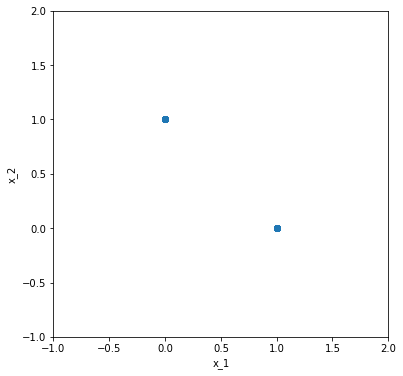

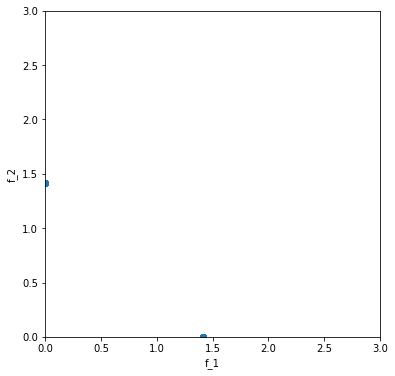

In [37]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import sqrt

objectives = [
    lambda x: sqrt((x[0] - 1)**2 + x[1]**2),
    lambda x: sqrt(x[0]**2 + (x[1] - 1)**2),
]

obj_jacobians = [
    # there's a division by zero error causing a warning when
    # we're exactly on one of the points, but this doesn't seem to
    # cause problems so I just ignore the warning
    lambda x: np.array([(2*x[0] - 2) / (2*objectives[0](x)), (2*x[1]) / (2*objectives[0](x))]),
    lambda x: np.array([2*x[0] / (2*objectives[1](x)), (2*x[1] - 2) / (2*objectives[1](x))]),
]

def weighted_objective(weights, x):
    return sum([w * obj(x) for (w, obj) in zip(weights, objectives)])

def weighted_jacobian(weights, x):
    return sum([w * jac(x) for (w, jac) in zip(weights, obj_jacobians)])

def gen_points_weighted(count):
    """Generate a set of Pareto optimal points
    using a random set of weights.
    """
    weights = np.random.random((count, 2))
    
    def find_point(weight):
        return minimize(
            fun=lambda x: weighted_objective(weight, x),
            x0=[1, 1],
            jac=lambda x: weighted_jacobian(weight, x),
            method='SLSQP',
            bounds=((0, 2), (0, 2)),
            options={"disp": False, "ftol": 1e-20, "maxiter": 1000},
        ).x
        
    return [find_point(w) for w in weights]

# plot a set of points generated by the above

points = gen_points_weighted(100)
obj_values = [[obj(x) for x in points] for obj in objectives]

# decision space
plt.figure(figsize=[6, 6])
plt.xlim([-1, 2])
plt.xlabel('x_1')
plt.ylim([-1, 2])
plt.ylabel('x_2')

plt.plot([x[0] for x in points], [x[1] for x in points], 'o')

# objective space
plt.figure(figsize=[6, 6])
plt.xlim([0, 3])
plt.xlabel('f_1')
plt.ylim([0, 3])
plt.ylabel('f_2')

plt.plot(obj_values[0], obj_values[1], 'o')

plt.show()

Turns out this method only finds the end points of the Pareto front, which tells us that the front isn't convex, but either linear or concave. Instead, in this case we can find the set of solutions analytically. The reasoning for this was already covered in exercise 6, but to review: For any given values of $f_1$ and $f_2$, the corresponding sets in the decision space are circles around the points $P_1 = (1, 0)$ and $P_2 = (0, 1)$ respectively. For a value of $f_1$, the lowest possible value of $f_2$ is the radius of the smallest circle that intersects with the circle defined by $f_1$. The intersection point is on the line between $P_1$ and $P_2$. The Pareto optimal case where neither circle can be made smaller without enlarging the other occurs when neither circle contains the other, which only happens when the intersection point is on the line segment between the two points.

The line segment can be defined as

$$
r(t) = (1, 0) + t((0, 1) - (1, 0)) \\
  = (1, 0) + t(-1, 1), t \geq 0
$$

and we can sample points on it by varying the value of $t$.

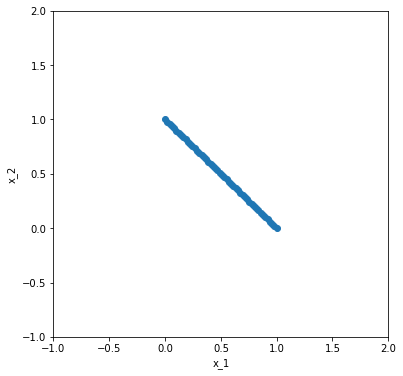

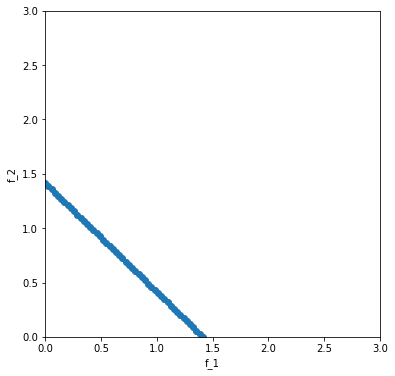

In [39]:
points = [[1 - t, t] for t in np.linspace(0, 1, 50)]
obj_values = [[obj(x) for x in points] for obj in objectives]

# decision space
plt.figure(figsize=[6, 6])
plt.xlim([-1, 2])
plt.xlabel('x_1')
plt.ylim([-1, 2])
plt.ylabel('x_2')

plt.plot([x[0] for x in points], [x[1] for x in points], 'o')

# objective space
plt.figure(figsize=[6, 6])
plt.xlim([0, 3])
plt.xlabel('f_1')
plt.ylim([0, 3])
plt.ylabel('f_2')

plt.plot(obj_values[0], obj_values[1], 'o')

plt.show()

This set is perfectly evenly spaced by construction. If the objective functions were more complicated and this couldn't be done, I would try the epsilon constraint method next, but it's luckily not necessary now.